<a href="https://colab.research.google.com/github/shekhs/Time-Series-Forecasting/blob/main/Introduction_to_Forecasting_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and data loading



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Set Working Directory
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python
#%cd /content/drive/MyDrive/Personal/Forecasting Models and Time Series for Business in Python 2021

/content/drive/.shortcut-targets-by-id/1PPU1CxtBeYaPlKtx2GN7ulYeIrUPxq6s/Forecasting Models and Time Series for Business in Python


In [8]:
#importing libraries
import pandas as pd
import numpy as np

In [7]:
#get data
data = pd.read_csv("Daily Bike Sharing.csv", index_col="dteday", parse_dates=True)
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
#Selecting variables
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit", 
                       "temp", "atemp", "hum", "windspeed"]]

# Data Transformation

In [10]:
#rename forecasting variable
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head()

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


In [22]:
#index
dataset.index
dataset = dataset.asfreq("D")

# Visualization

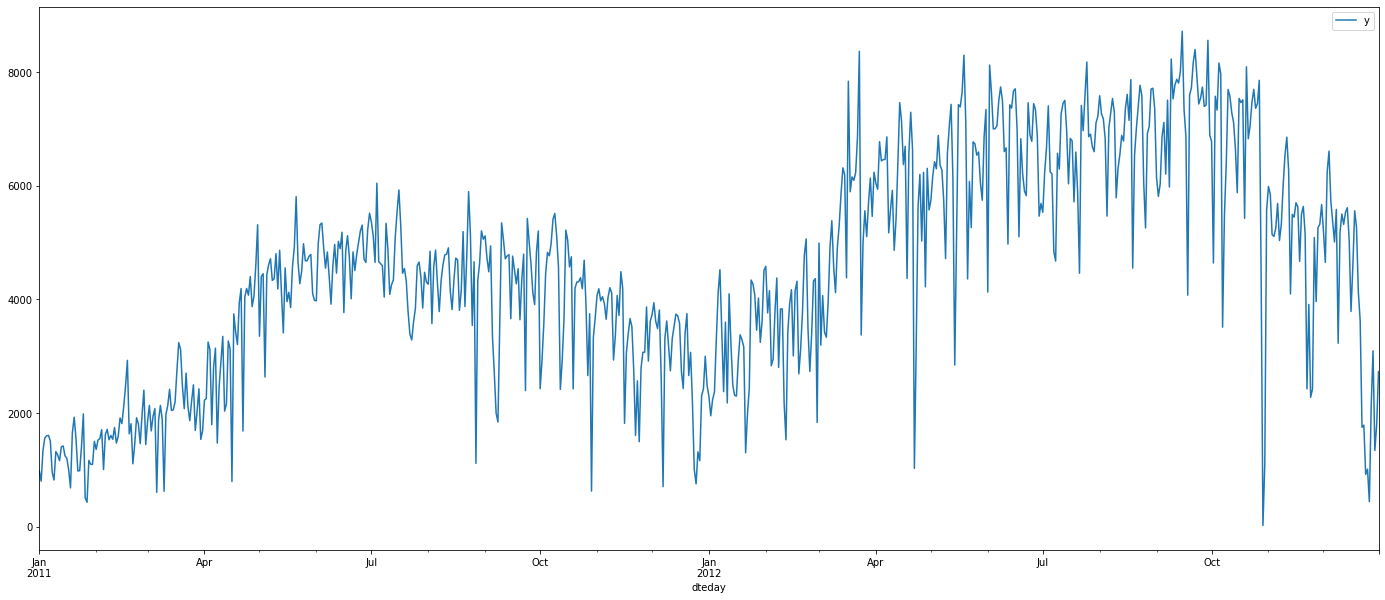

In [27]:
#Visualization
dataset["y"].plot(figsize = (24,10),legend = True)

# Seasonal Decomposition

In [28]:
#importing Decomposition library
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


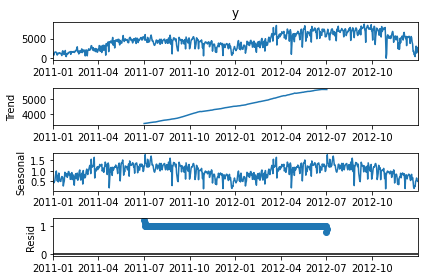

In [35]:
#decomposition

decomposition = seasonal_decompose(dataset['y'],
                                   model = 'multiplicative',
                                   freq=365)
decomposition.plot();

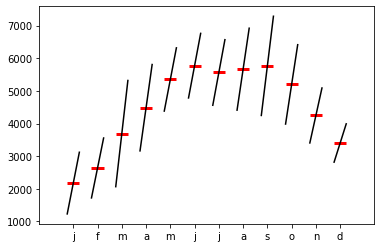

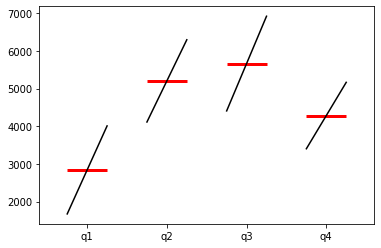

In [38]:
#seasonality graphs
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
month_plot(dataset['y'].resample(rule = 'MS').mean())
quarter_plot(dataset['y'].resample(rule = 'Q').mean());

# Training and Test Set

In [43]:
test_days = 31
training_set = dataset.iloc[:-test_days,:]
test_set = dataset.iloc[-test_days:,:]
test_set.tail(2)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-30,1796,0,0,1,0.255833,0.231700,0.483333,0.350754
2012-12-31,2729,0,1,2,0.215833,0.223487,0.577500,0.154846


# Holt-Winters

In [44]:
# importing libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [46]:
#forecasting model
model = ExponentialSmoothing(endog = training_set.y,
                             trend = 'mul',
                             seasonal = 'mul',
                             seasonal_periods=7).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [57]:
#making predictions
predictions_hw = model.forecast(steps = len(test_set)).rename("HW")


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


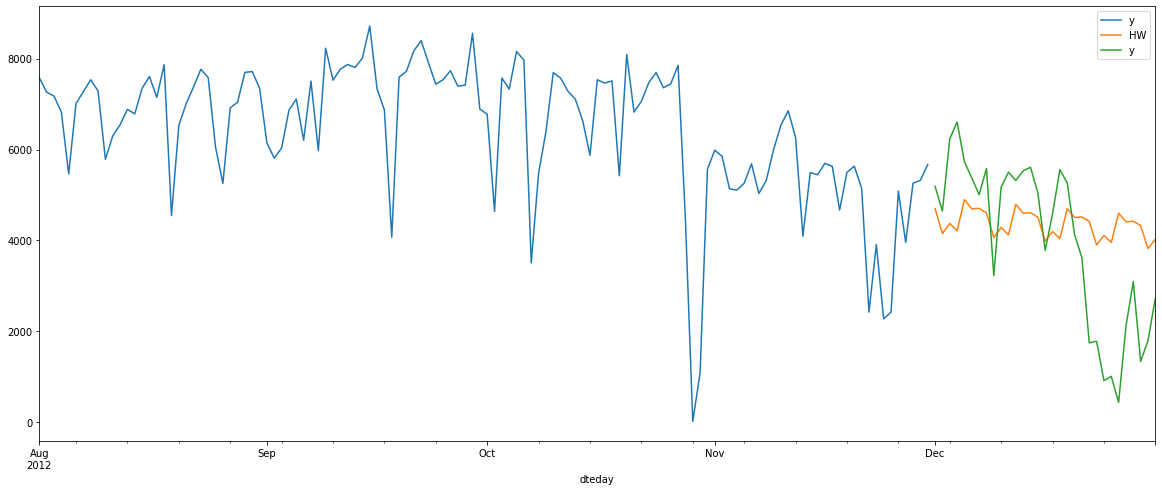

In [58]:
# plotting prediction results
training_set['y']['2012-08-01':].plot(figsize=[20,8],legend=True)
predictions_hw.plot(legend = True)
test_set.y.plot(legend = True)

# Model assessment

In [60]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE : ",end="")
print(round(mean_absolute_error(test_set['y'], predictions_hw),0))
print("RMSE : ",end="")
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_hw)), 0))

MAE : 1390.0
RMSE : 1713.0


In [64]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("MAPE : ",end="")
print(MAPE(test_set['y'], predictions_hw))

MAPE : 88.14082811284679


# Exporting forecasts

In [67]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble
predictions_hw.to_csv('predictions_hw.csv', index = True)